<a href="https://colab.research.google.com/github/MurtazAlek/MLDM-2021/blob/main/Murtazina_%22MLDM_2021_seminar04_homework%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please, fill in before you start:
First Name: **Aleksandra**

Last Name: **Murtazina**

Group:

# Task 1 (3 points + 2 bonus points for a well organized and easy to read plot + 1 bonus point for the short comment)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso

Consider the following toy dataset with pairs of correlated features:

In [ ]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

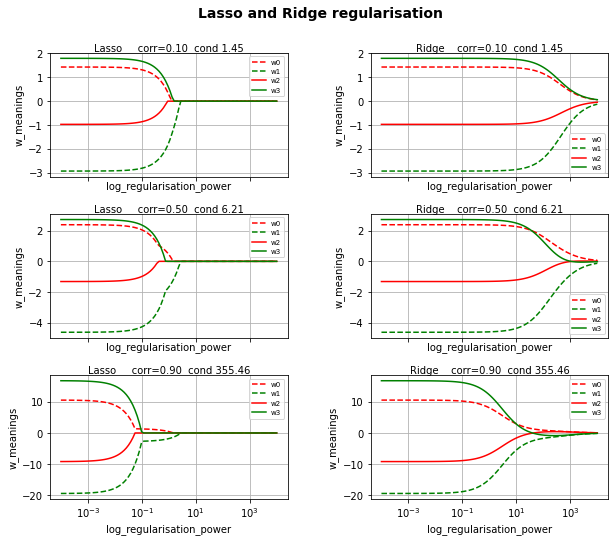

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler


corr_meaning=[0.1, 0.5,0.9]
alpha_values = np.logspace(-4, 4, 100, base=10)
#kritical=[1000,100,1]
scaller = StandardScaler()

params_lasso=[]
params_ridge=[]
cond=[]

for i, correlation in enumerate(corr_meaning):
  X, y = gen_data(500, correlation)
  X_scaller = scaller.fit_transform(X)
  cond.append(np.linalg.cond(np.transpose(X_scaller).dot(X_scaller)))


  params_lasso_corr = []
  params_ridge_corr = []



  for alpha in (alpha_values):
    lasso = Lasso(random_state=17, alpha=(alpha), fit_intercept=False)
    ridge = Ridge(random_state=17, alpha=(alpha), fit_intercept=False)
    lasso.fit(X_scaller, y)
    ridge.fit(X_scaller, y)
    params_lasso_corr.append(lasso.coef_)
    params_ridge_corr.append(ridge.coef_)
  params_lasso.append(params_lasso_corr)
  params_ridge.append(params_ridge_corr)


def column(massiv, i):
  return np.array([row[i] for row in massiv])


fig, axes = plt.subplots(nrows=len(corr_meaning), ncols=2, figsize=(10,8), squeeze=False, sharex=True)
fig.suptitle('Lasso and Ridge regularisation', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.90, wspace=0.35, hspace=0.30)

for i in range(len(corr_meaning)):
  ax_l=axes[i][0]
  ax_l.plot((alpha_values), column(params_lasso[i],0), '--', color='red', markersize=1,label='w0')
  ax_l.plot((alpha_values), column(params_lasso[i],1), '--', color='green', markersize=1,label='w1')
  ax_l.plot((alpha_values), column(params_lasso[i],2), color='red', markersize=1,label='w2')
  ax_l.plot((alpha_values), column(params_lasso[i],3), color='green', markersize=1,label='w3')
  ax_l.set_xlabel('log_regularisation_power', fontsize=10)
  ax_l.set_ylabel('w_meanings', fontsize=10)
  ax_l.grid()
  ax_l.set_xscale('log')
  legend_l = ax_l.legend(loc=0, shadow=False, fontsize='x-small')
  ax_l.set_title('Lasso     corr=%0.2f  cond %0.2f' % (corr_meaning[i], cond[i]), fontsize=10, pad=1)

  ax_r = axes[i][1]
  ax_r.plot((alpha_values), column(params_ridge[i], 0), '--', color='red', markersize=1, label='w0')
  ax_r.plot((alpha_values), column(params_ridge[i], 1), '--', color='green', markersize=1, label='w1')
  ax_r.plot((alpha_values), column(params_ridge[i], 2), color='red', markersize=1, label='w2')
  ax_r.plot((alpha_values), column(params_ridge[i], 3), color='green', markersize=1, label='w3')
  ax_r.set_xlabel('log_regularisation_power', fontsize=10)
  ax_r.set_ylabel('w_meanings', fontsize=10)
  ax_r.grid()
  ax_r.set_xscale('log')
  legend_r = ax_r.legend(loc=0, shadow=False, fontsize='x-small')
  ax_r.set_title('Ridge    corr=%0.2f  cond %0.2f' % (corr_meaning[i], cond[i]),fontsize=10, pad=1)

plt.show()


In [ ]:
data=[]
corr_meaning=[0.1, 0.5,0.9]
number=np.linspace(0,500,100)
for i in corr_meaning:
  X, y = gen_data(500, i)
  X_scaller = scaller.fit_transform(X)
  d=[]
  for a in number:
    d.append(np.linalg.cond(np.transpose(X_scaller).dot(X_scaller)+a*np.eye(4)))
  data.append(d)
data=np.array(data)


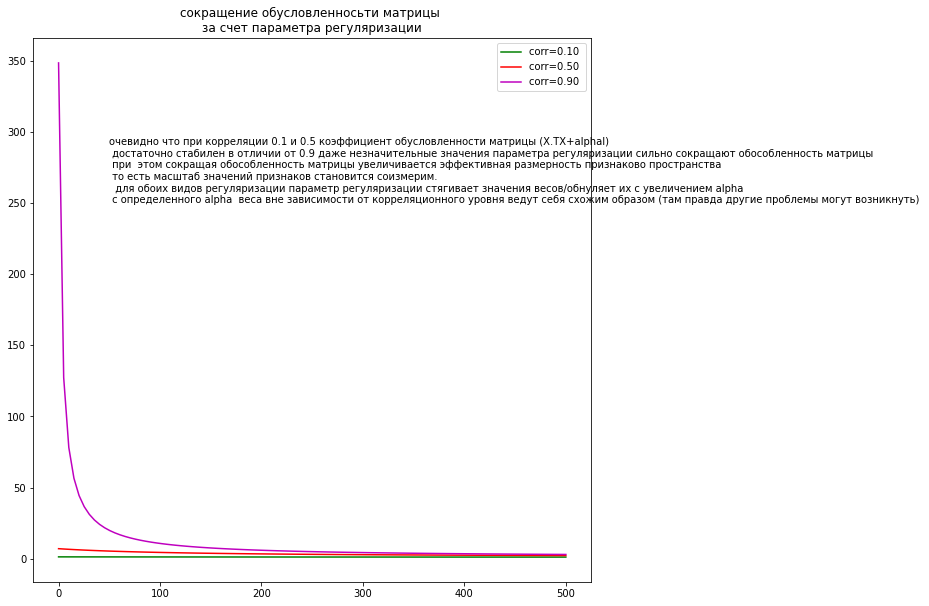

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), squeeze=False, sharex=False)
ax=axes[0][0]
ax.plot(number,(data[0]),c='g', label='corr=%0.2f ' % corr_meaning[0])
ax.plot(number,(data[1]),c='r', label='corr=%0.2f ' % corr_meaning[1])
ax.plot(number,(data[2]),c='m', label='corr=%0.2f ' % corr_meaning[2])
ax.legend()
ax.text(50,250, 'очевидно что при корреляции 0.1 и 0.5 коэффициент обусловленности матрицы (X.TX+alphaI) \n достаточно стабилен в отличии от 0.9 даже незначительные значения параметра регуляризации сильно сокращают обособленность матрицы \n при  этом сокращая обособленность матрицы увеличивается эффективная размерность признаково пространства \n то есть масштаб значений признаков становится соизмерим. \n  для обоих видов регуляризации параметр регуляризации стягивает значения весов/обнуляет их с увеличением alpha \n с определенного alpha  веса вне зависимости от корреляционного уровня ведут себя схожим образом (там правда другие проблемы могут возникнуть) ')
ax.set_title('сокращение обусловленносьти матрицы \n за счет параметра регуляризации ')
plt.show()